# Welcome to Top Books Details Finder

# Library


In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request, urlretrieve
from IPython.display import IFrame, display
from PIL import Image
from selenium import webdriver
import os

# Input your favourate book

In [2]:
inp = input('Enter the topic to get top relevant books : ')

Enter the topic to get top relevant books :  machine learning


# Relevant Book Scraper

In [3]:
def relevant_book_scraper(inp):
    url = 'https://www.google.com//search?tbm=bks&q='+ inp
    driver = webdriver.Chrome(executable_path=r'C:\Users\jpravijo\Desktop\Anaconda\chromedriver_win32 (3)\chromedriver.exe')
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    driver.close()
    book_name_list, authors_list, relevant_no_list, links_list = [], [], [], []
    k = 1
    for i, content in enumerate(soup.find_all('div', class_='bHexk Tz5Hvf')):
        if k>5:
            break
        
        # Book Names Scraping
        try:
            book_name = content.find('h3', class_='LC20lb DKV0Md').text
            book_name = book_name.split('-')[0]
        except:
            book_name = 'Book Name not found'
        
        # Authors Names Scraping
        try:
            authors = content.find('div', class_='N96wpd').text
            authors = authors.split('·')[0]
        except:
            authors = ' Authors Name not found'
        
        # Detailed Information links Scraping
        try:
            try:
                links = content.find('a', class_='yKioRe VZ2GVc')['href']
            
            except:
                links = content.find('a')['href']
                
            if 'edition' in links:
                links = 'https://www.google.co.in' + links

        except:
            links = 'Links Not Found'   
        
        if book_name not in book_name_list:
            book_name_list.append(book_name)
            authors_list.append(authors)
            relevant_no_list.append(k)
            links_list.append(links)
            k+=1
        
        else:
            continue
        
    dic = {'Relevant_No': relevant_no_list, 'Books_Name' : book_name_list, 'Author_Names':authors_list, 'Links':links_list}
    df = pd.DataFrame(dic)
    df.set_index('Relevant_No', inplace=True)

    return df

In [4]:
df = relevant_book_scraper(inp)

In [5]:
df.head()

,Books_Name,Author_Names,Links
Relevant_No,,,
1,Machine Learning: An Artificial Intelligence A...,"Ryszard S. Michalski, ‎Jaime G. Carbonell, ‎To...",https://books.google.co.in/books?id=Aw2jBQAAQB...
2,Deep Learning,"Ian Goodfellow, ‎Yoshua Bengio, ‎Aaron Courville",https://books.google.co.in/books?id=omivDQAAQB...
3,Machine Learning: A Probabilistic Perspective,Kevin P. Murphy,https://books.google.co.in/books?id=NZP6AQAAQB...
4,Interpretable Machine Learning,Christoph Molnar,https://books.google.co.in/books?id=jBm3DwAAQB...
5,Machine Learning: A Guide to Current Research,"Tom M. Mitchell, ‎Jaime G. Carbonell, ‎Ryszard...",https://books.google.co.in/books?id=BSbSBwAAQB...


# To Scrape the Detail of the Interested book

In [6]:
def book_details(df, index):
    index-=1
    url = df.iloc[index, 2]
    book_name = df.iloc[index, 0]
    driver = webdriver.Chrome(executable_path=r'C:\Users\jpravijo\Desktop\Anaconda\chromedriver_win32 (3)\chromedriver.exe')
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    driver.close()
    print(f'\n\033[1mTHE DETAILS ARE AS FOLLOWS \033[0m\n')
    print(f'Book Name:\033[1m {book_name} \033[0m')
    
    # Title page image scraping
    filepath = r"C:\Users\jpravijo\Desktop\Anaconda\Book Images\\" + book_name + ".png"
    try:
        try:
            name = soup.find('div', class_="WnWrFd").text
            img = soup.find('img', alt=name)['src']
        except:
            img = soup.find('img', class_='rISBZc M4dUYb')['src']
        urlretrieve(img, filepath)
        image = Image.open(filepath)
    except:
        image='Not Found'
    
    # To Scrape and Print the Details
    for i, content in enumerate(soup.find_all('div', class_="Z1hOCe")):
        print(content.text)
    return image

enter the index of the favourate book from above for more details:  4



THE DETAILS ARE AS FOLLOWS 

Book Name: Interpretable Machine Learning 
ISBN: 9780244768522, 0244768528
Page count: 320
Published: 28 February 2020
Format: Paperback
Publisher: Lulu.com
Language: English
Author: Christoph Molnar
Originally published: 28 February 2020
Subject: Machine learning, Supervised learning (Machine learning)

 The title page of the book you have searched 



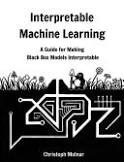

In [8]:
index = int(input('enter the index of the favourate book from above for more details: '))
image = book_details(df, index)
print('\n \033[1mThe title page of the book you have searched \033[0m\n')
image